## Importing libraries

In [419]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.tree import plot_tree
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier


In [420]:
df = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/Practice/conversion_data.csv")

## Data Overview

In [421]:
df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [423]:
df.describe(include = 'all')

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,999.500000,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


In [424]:
df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


In [425]:
df.columns

Index(['Unnamed: 0', 'visitor_id', 'visitor_location', 'marketing_channel',
       'gender', 'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

In [426]:
df.groupby('converted_Fri').count()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Mon,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri
converted_Fri,,,,,,,,,,,,,,,,,,,,,
0,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,...,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256
1,744,744,744,744,744,744,744,744,744,744,...,744,744,744,744,744,744,744,744,744,744


In [427]:
# Univaritae Analysis : 

In [428]:
df['visitor_id'].unique()

array([   1,    2,    3, ..., 1998, 1999, 2000], dtype=int64)

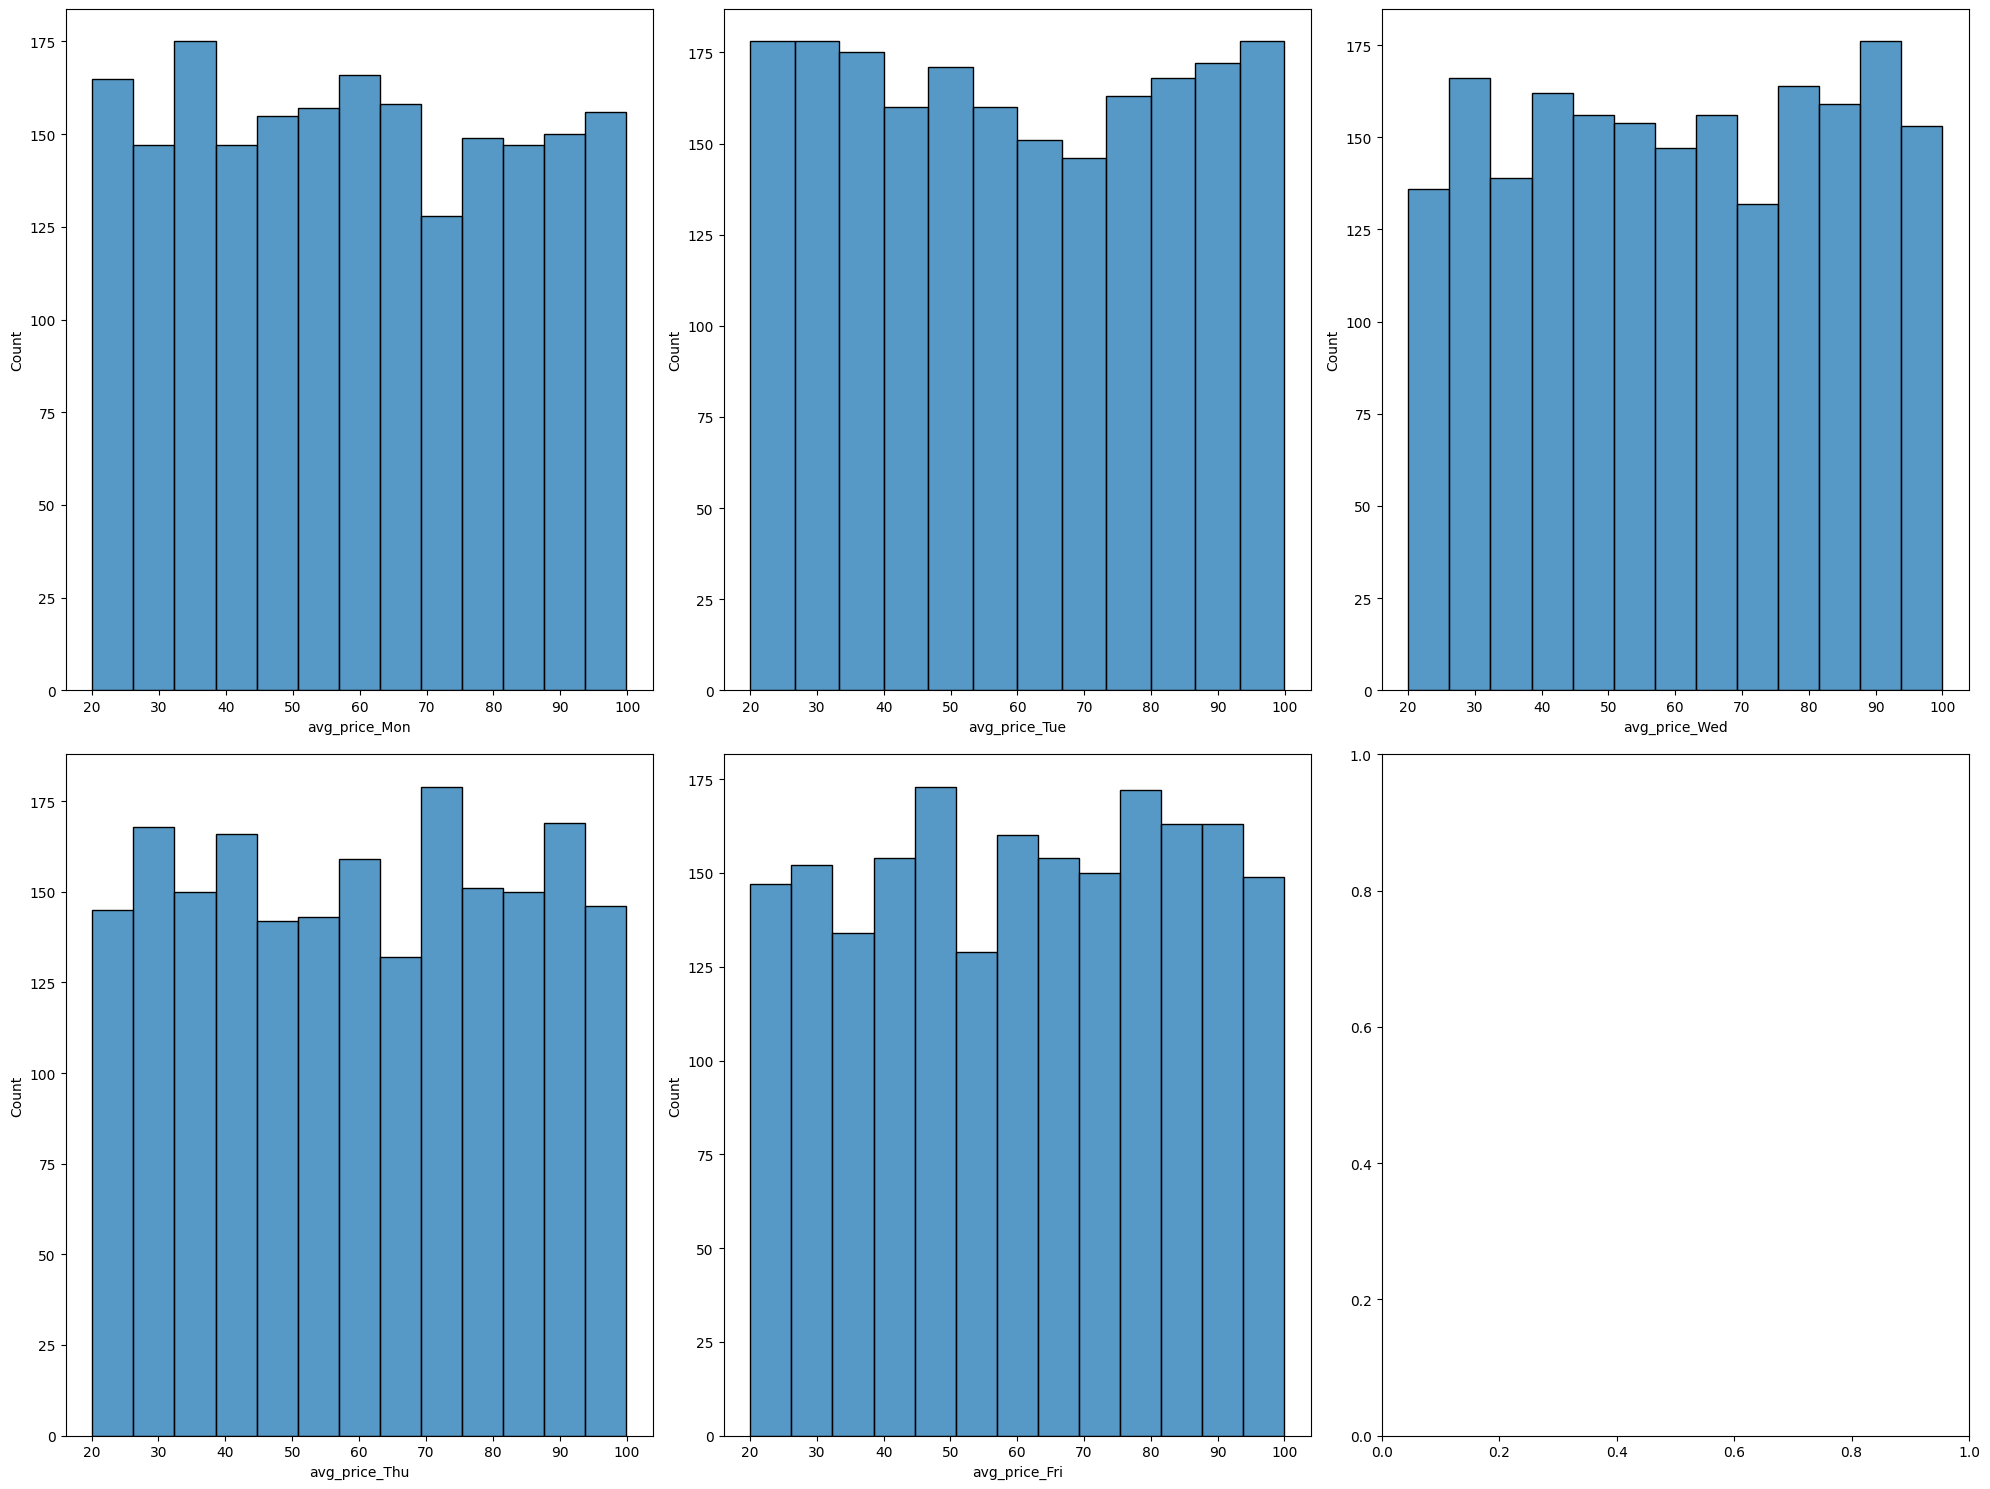

In [429]:
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(2, 3, figsize=(20, 15))  # Adjusted grid size
sns.histplot(df['avg_price_Mon'], ax=ax1)
sns.histplot(df['avg_price_Tue'], ax=ax2)
sns.histplot(df['avg_price_Wed'], ax=ax3)
sns.histplot(df['avg_price_Thu'], ax=ax4)
sns.histplot(df['avg_price_Fri'], ax=ax5)
plt.tight_layout()  
plt.show()

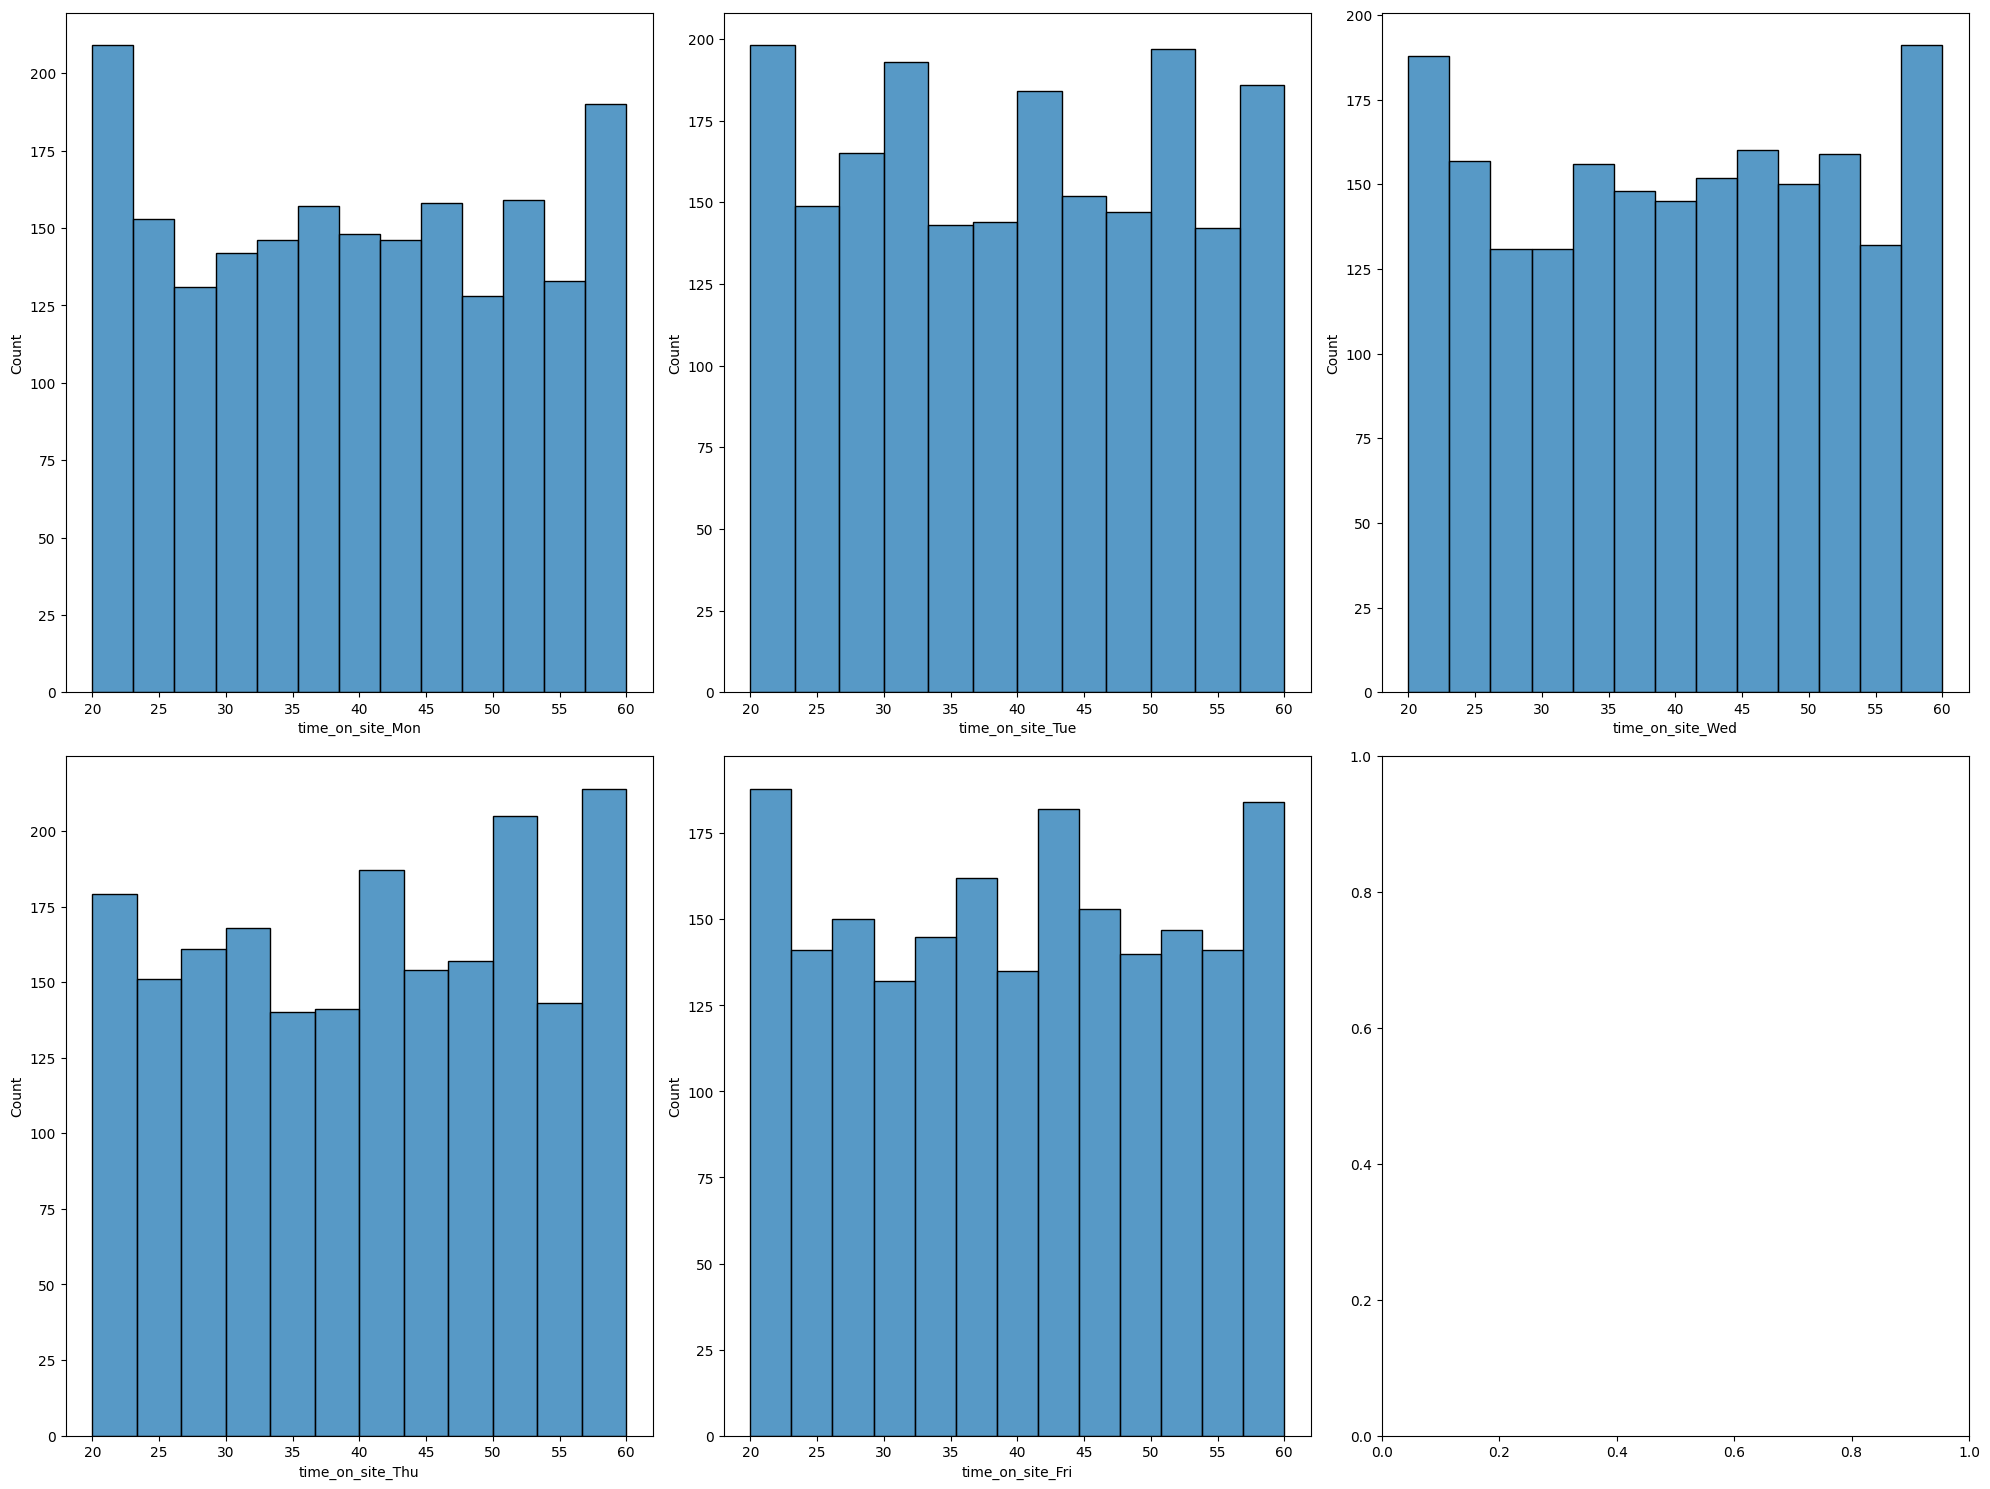

In [430]:
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(2, 3, figsize=(20, 15))  # Adjusted grid size
sns.histplot(df['time_on_site_Mon'], ax=ax1)
sns.histplot(df['time_on_site_Tue'], ax=ax2)
sns.histplot(df['time_on_site_Wed'], ax=ax3)
sns.histplot(df['time_on_site_Thu'], ax=ax4)
sns.histplot(df['time_on_site_Fri'], ax=ax5)
plt.tight_layout()  
plt.show()

Let's compare them to target variable now:

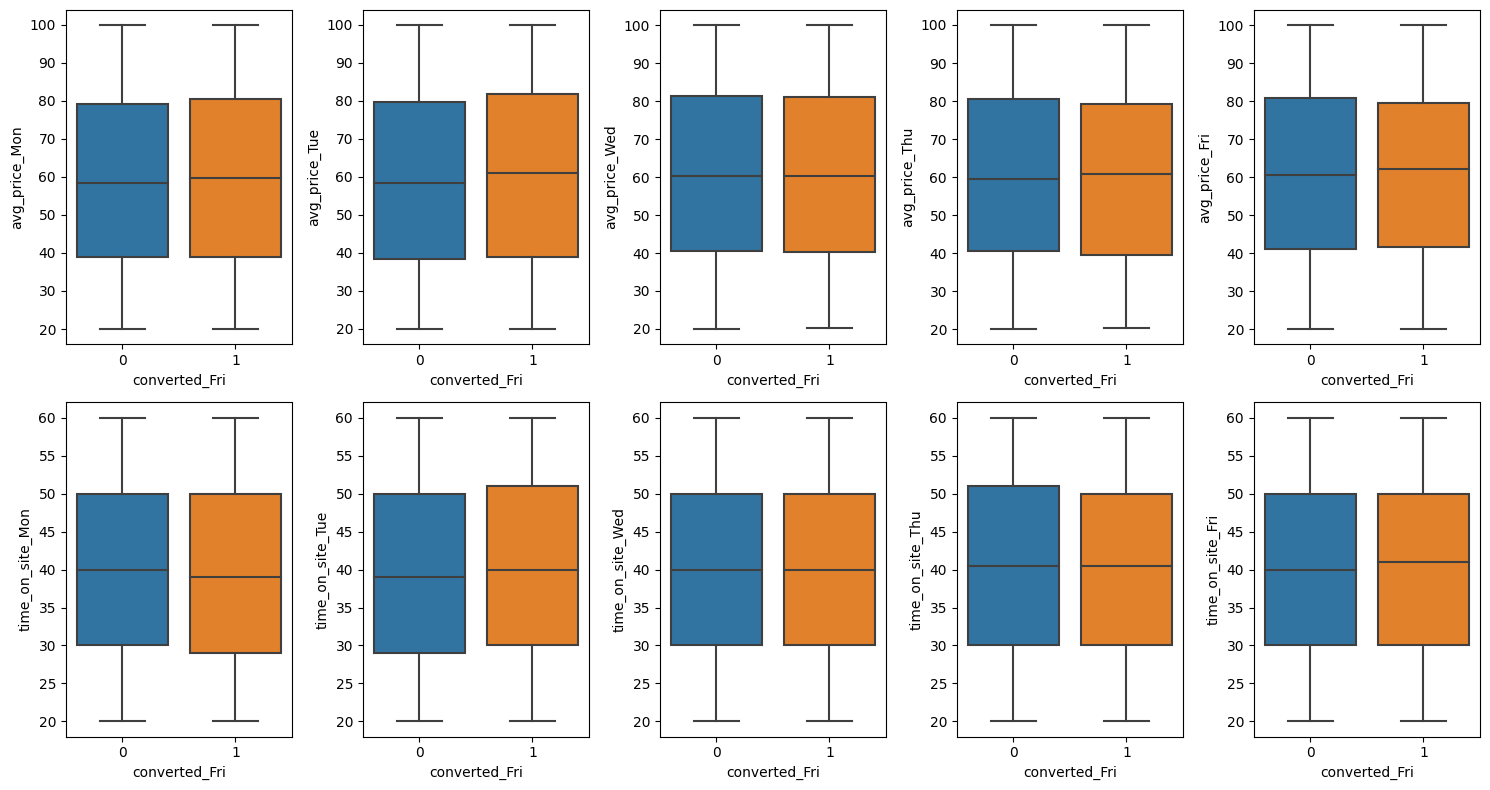

In [431]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(15, 8))

sns.boxplot(x='converted_Fri', y='avg_price_Mon', data=df, ax=ax1)
sns.boxplot(x='converted_Fri', y='avg_price_Tue', data=df, ax=ax2)
sns.boxplot(x='converted_Fri', y='avg_price_Wed', data=df, ax=ax3)
sns.boxplot(x='converted_Fri', y='avg_price_Thu', data=df, ax=ax4)
sns.boxplot(x='converted_Fri', y='avg_price_Fri', data=df, ax=ax5)

sns.boxplot(x='converted_Fri', y='time_on_site_Mon', data=df, ax=ax6)
sns.boxplot(x='converted_Fri', y='time_on_site_Tue', data=df, ax=ax7)
sns.boxplot(x='converted_Fri', y='time_on_site_Wed', data=df, ax=ax8)
sns.boxplot(x='converted_Fri', y='time_on_site_Thu', data=df, ax=ax9)
sns.boxplot(x='converted_Fri', y='time_on_site_Fri', data=df, ax=ax10)

plt.tight_layout()
plt.show()


From the above distribution we can see that the data is very evenly spread in comparision to the target variable, this could also mean that the target variable has no impact from this variables. We will do some bivariate analysis now.

In [432]:
df.columns

Index(['Unnamed: 0', 'visitor_id', 'visitor_location', 'marketing_channel',
       'gender', 'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

In [433]:
df.shape

(2000, 31)

In [434]:
for i in ['visitor_location', 'marketing_channel', 'gender']:
    print(df.groupby([i,'converted_Fri'])['visitor_id'].count().unstack())
    print('---------------------------------------------')

converted_Fri       0    1
visitor_location          
Asia              231  138
Australia         268  135
Europe            235  148
North America     267  145
South America     255  178
---------------------------------------------
converted_Fri        0    1
marketing_channel          
facebook           238  156
google             234  165
instagram          257  174
organic            311   96
youtube            216  153
---------------------------------------------
converted_Fri    0    1
gender                 
F              602  491
M              654  253
---------------------------------------------


#### We can draw few conclusion from above tables: 
1.  Location wise highest conversion was in South America and Europe.
2.  Location wise lowest conversion was in Australia and North America.
3.  Most of the traffic coming from Instagram (431) and organic (407).
4.  Less trafic is coming from facebook and google and least from youtube

In [435]:
for i in ['product_views_Mon', 'product_views_Tue', 'product_views_Wed']:
    print(df.groupby([i,'converted_Fri'])['visitor_id'].count().unstack())
    print('---------------------------------------------')

converted_Fri        0    1
product_views_Mon          
0                  210  116
1                  195  123
2                  191  134
3                  224  124
4                  221  123
5                  215  124
---------------------------------------------
converted_Fri        0    1
product_views_Tue          
0                  226  124
1                  220  133
2                  213  117
3                  207  117
4                  194  125
5                  196  128
---------------------------------------------
converted_Fri          0      1
product_views_Wed              
0                  515.0  112.0
1                   99.0  151.0
2                  115.0  126.0
3                  108.0  115.0
4                  116.0  121.0
5                   99.0  119.0
6                   81.0    NaN
7                   51.0    NaN
8                   48.0    NaN
9                   24.0    NaN
---------------------------------------------


In [436]:
for i in ['product_views_Thu', 'product_views_Fri']:
    print(df.groupby([i,'converted_Fri'])['visitor_id'].count().unstack())
    print('---------------------------------------------')

converted_Fri          0      1
product_views_Thu              
-4                   NaN    4.0
-3                   NaN   16.0
-2                   NaN   37.0
-1                   NaN   31.0
 0                 597.0   46.0
 1                 137.0   56.0
 2                 120.0   59.0
 3                 120.0   63.0
 4                  97.0   62.0
 5                  84.0  370.0
 6                  50.0    NaN
 7                  32.0    NaN
 8                  19.0    NaN
---------------------------------------------
converted_Fri          0      1
product_views_Fri              
-3                   NaN   13.0
-2                   NaN   11.0
-1                   NaN   36.0
 0                 640.0   32.0
 1                 116.0   54.0
 2                 123.0   52.0
 3                 120.0   52.0
 4                  91.0   54.0
 5                  71.0  440.0
 6                  44.0    NaN
 7                  38.0    NaN
 8                  13.0    NaN
--------------------------

Before moving on we see that there is some negative values in or data for Thurs and Fri, we need to handel that.

In [437]:
print("No. of product on thursday",df[df['product_views_Thu'] < 0].shape[0])
print("No. of product on Frisday",df[df['product_views_Fri'] < 0].shape[0])
print("% of data: ", ((88+60)/2000)*100)

No. of product on thursday 88
No. of product on Frisday 60
% of data:  7.3999999999999995


this is less than ten percent so we can wither handel them or remove them, I will check for rest of the variables first and then drop these if the total is less than 10 percent.

---------------------------------------------------------------------------------

So from above data we can say that the number of products visited on wed to Fri are more, but this could be because of addition of a new product.

In [438]:
for i in ['pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed']:
    print(df.groupby([i,'converted_Fri'])['visitor_id'].count().unstack())
    print('---------------------------------------------')

converted_Fri        0    1
pages_visited_Mon          
1                  177  123
2                  196  111
3                  168  109
4                  156  108
5                  181  106
6                  196  103
7                  182   84
---------------------------------------------
converted_Fri        0    1
pages_visited_Tue          
1                  183   97
2                  170  100
3                  184   93
4                  178  111
5                  152  116
6                  192  125
7                  197  102
---------------------------------------------
converted_Fri        0    1
pages_visited_Wed          
1                  172   86
2                  182  102
3                  180  116
4                  154   98
5                  208  106
6                  161  118
7                  199  118
---------------------------------------------


In [439]:
for i in ['pages_visited_Thu', 'pages_visited_Fri']:
    print(df.groupby([i,'converted_Fri'])['visitor_id'].count().unstack())
    print('---------------------------------------------')

converted_Fri        0    1
pages_visited_Thu          
1                  190  120
2                  185  111
3                  194   95
4                  191  105
5                  155  106
6                  158   94
7                  183  113
---------------------------------------------
converted_Fri        0    1
pages_visited_Fri          
1                  169  102
2                  172  100
3                  180  113
4                  166  124
5                  164   90
6                  183  102
7                  222  113
---------------------------------------------


From the above analysis we can conclude that the maximum number pages which are seven are visited on Wednesday and Friday.

In [440]:
df['avg_rating_Mon'].describe()

count    2000.000000
mean        3.023990
std         1.151037
min         1.000000
25%         2.017500
50%         3.055000
75%         4.022500
max         5.000000
Name: avg_rating_Mon, dtype: float64

In [441]:
def rating_bins(rate):
    if rate >= 1 and rate <= 2:
        return 'Worst'
    elif rate >= 2 and rate <= 3:
        return 'Bad'
    elif rate >= 3 and rate <= 4:
        return 'Good'
    elif rate >= 4 and rate <= 5:
        return 'Great'
    else:
        return 'No Rating'

In [442]:
df['avg_rating_Mon'] = df.apply(lambda x: rating_bins(x['avg_rating_Mon']), axis=1)
df['avg_rating_Tue'] = df.apply(lambda x: rating_bins(x['avg_rating_Tue']), axis=1)
df['avg_rating_Wed'] = df.apply(lambda x: rating_bins(x['avg_rating_Wed']), axis=1)
df['avg_rating_Thu'] = df.apply(lambda x: rating_bins(x['avg_rating_Thu']), axis=1)
df['avg_rating_Fri'] = df.apply(lambda x: rating_bins(x['avg_rating_Fri']), axis=1)

In [443]:
print("See if there are any points with no rating: ",df['avg_rating_Mon'].unique())
print("See if there are any points with no rating: ",df['avg_rating_Tue'].unique())
print("See if there are any points with no rating: ",df['avg_rating_Wed'].unique())
print("See if there are any points with no rating: ",df['avg_rating_Thu'].unique())
print("See if there are any points with no rating: ",df['avg_rating_Fri'].unique())

See if there are any points with no rating:  ['Good' 'Worst' 'Bad' 'Great']
See if there are any points with no rating:  ['Bad' 'Great' 'Good' 'Worst']
See if there are any points with no rating:  ['Great' 'Worst' 'Good' 'Bad']
See if there are any points with no rating:  ['Good' 'Bad' 'Worst' 'Great']
See if there are any points with no rating:  ['Worst' 'Great' 'Good' 'Bad']


In [444]:
for i in ['avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri']:
    print(df.groupby([i,'converted_Fri'])['visitor_id'].count().unstack())
    print('---------------------------------------------')

converted_Fri     0    1
avg_rating_Mon          
Bad             309  175
Good            326  191
Great           301  206
Worst           320  172
---------------------------------------------
converted_Fri     0    1
avg_rating_Tue          
Bad             299  186
Good            335  188
Great           321  194
Worst           301  176
---------------------------------------------
converted_Fri     0    1
avg_rating_Wed          
Bad             305  197
Good            320  189
Great           303  165
Worst           328  193
---------------------------------------------
converted_Fri     0    1
avg_rating_Thu          
Bad             287  197
Good            336  196
Great           329  165
Worst           304  186
---------------------------------------------
converted_Fri     0    1
avg_rating_Fri          
Bad             322  185
Good            317  190
Great           302  177
Worst           315  192
---------------------------------------------


### Takeaways from this above analysis:

1. People gave worst rating in total( who converted and also who didn't)  to prodcts on wed and Fri, intrestingly there were new addition on number of products also.
2. People gave best rating on Monday and Tuesday, even though the number of products were less.

3. On Monday we can see a lot of happy converted customers as they gave good rating and also bought the product.

4. On the other hand, we see a lot of unhappy customers who gave bad rating on Friday and also didn't buy anything. Intrestingly a lot of converted customers were unahappy and gave bad rating on Wednesday and Thursday.

----------------------------------------------------------------------------

## Data Cleaning

Now we know that we have only few row which have incorrect data and since the percentage is less than ten so we will drop them.

In [445]:
df.drop(df[df['product_views_Thu'] < 0].index, axis=0, inplace=True)
df.drop(df[df['product_views_Fri'] < 0].index, axis=0, inplace=True)

In [446]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['visitor_id'], inplace=True)

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1859 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_location   1859 non-null   object 
 1   marketing_channel  1859 non-null   object 
 2   gender             1859 non-null   object 
 3   product_views_Mon  1859 non-null   int64  
 4   product_views_Tue  1859 non-null   int64  
 5   product_views_Wed  1859 non-null   int64  
 6   product_views_Thu  1859 non-null   int64  
 7   product_views_Fri  1859 non-null   int64  
 8   avg_rating_Mon     1859 non-null   object 
 9   avg_rating_Tue     1859 non-null   object 
 10  avg_rating_Wed     1859 non-null   object 
 11  avg_rating_Thu     1859 non-null   object 
 12  avg_rating_Fri     1859 non-null   object 
 13  avg_price_Mon      1859 non-null   float64
 14  avg_price_Tue      1859 non-null   float64
 15  avg_price_Wed      1859 non-null   float64
 16  avg_price_Thu      1859 non-n

In [448]:
df.drop_duplicates(inplace=True)

In [449]:
df.shape

(1859, 29)

## Feature Engineering

1. We converted avg rating into bins above which is also part of feature engineering.

In [450]:
df['avg_rating_Mon'] = df['avg_rating_Mon'].map({'Bad':2, 'Worst': 1,'Good':3, 'Great' : 4}).astype(int)
df['avg_rating_Tue'] = df['avg_rating_Tue'].map({'Bad':2, 'Worst': 1,'Good':3, 'Great' : 4}).astype(int)
df['avg_rating_Wed'] = df['avg_rating_Wed'].map({'Bad':2, 'Worst': 1,'Good':3, 'Great' : 4}).astype(int)
df['avg_rating_Thu'] = df['avg_rating_Thu'].map({'Bad':2, 'Worst': 1,'Good':3, 'Great' : 4}).astype(int)
df['avg_rating_Fri'] = df['avg_rating_Fri'].map({'Bad':2, 'Worst': 1,'Good':3, 'Great' : 4}).astype(int)

In [451]:
df['gender'] = df['gender'].map({'M':0, 'F': 1}).astype(int)

In [452]:
df['visitor_location'] = df['visitor_location'].map({'North America':0, 'South America': 1,'Australia':2, 'Asia' : 3, 'Europe' : 4}).astype(int)

In [453]:
df['marketing_channel'].unique()

array(['youtube', 'organic', 'facebook', 'instagram', 'google'],
      dtype=object)

In [454]:
df['marketing_channel'] = df['marketing_channel'].map({'youtube':0, 'organic': 1,'facebook':2, 'instagram' : 3, 'google' : 4}).astype(int)

In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1859 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_location   1859 non-null   int32  
 1   marketing_channel  1859 non-null   int32  
 2   gender             1859 non-null   int32  
 3   product_views_Mon  1859 non-null   int64  
 4   product_views_Tue  1859 non-null   int64  
 5   product_views_Wed  1859 non-null   int64  
 6   product_views_Thu  1859 non-null   int64  
 7   product_views_Fri  1859 non-null   int64  
 8   avg_rating_Mon     1859 non-null   int32  
 9   avg_rating_Tue     1859 non-null   int32  
 10  avg_rating_Wed     1859 non-null   int32  
 11  avg_rating_Thu     1859 non-null   int32  
 12  avg_rating_Fri     1859 non-null   int32  
 13  avg_price_Mon      1859 non-null   float64
 14  avg_price_Tue      1859 non-null   float64
 15  avg_price_Wed      1859 non-null   float64
 16  avg_price_Thu      1859 non-n

## Model Building

Classification

In [456]:
df.columns

Index(['visitor_location', 'marketing_channel', 'gender', 'product_views_Mon',
       'product_views_Tue', 'product_views_Wed', 'product_views_Thu',
       'product_views_Fri', 'avg_rating_Mon', 'avg_rating_Tue',
       'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri', 'avg_price_Mon',
       'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu', 'avg_price_Fri',
       'time_on_site_Mon', 'time_on_site_Tue', 'time_on_site_Wed',
       'time_on_site_Thu', 'time_on_site_Fri', 'pages_visited_Mon',
       'pages_visited_Tue', 'pages_visited_Wed', 'pages_visited_Thu',
       'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

In [457]:
X = df[['visitor_location', 'marketing_channel', 'gender', 'product_views_Mon',
       'product_views_Tue', 'product_views_Wed', 'product_views_Thu',
       'product_views_Fri', 'avg_rating_Mon', 'avg_rating_Tue',
       'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri', 'avg_price_Mon',
       'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu', 'avg_price_Fri',
       'time_on_site_Mon', 'time_on_site_Tue', 'time_on_site_Wed',
       'time_on_site_Thu', 'time_on_site_Fri', 'pages_visited_Mon',
       'pages_visited_Tue', 'pages_visited_Wed', 'pages_visited_Thu',
       'pages_visited_Fri']]
y = df['converted_Fri']

In [458]:
scaler = StandardScaler()
model_X = scaler.fit(X)
X_scaled = model_X.transform(X)

X_train, X_test, y_train, y_test = train_test_split (X_scaled, y, random_state=42, test_size=0.3, shuffle=True)

1.  Logestic Reg

In [459]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [50, 100, 200],
    'C': [0.01, 0.1, 1, 10]
}
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [460]:
print("Logistic Regression Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Logistic Regression Model Accuracy (in %): 81.00358422939068


In [461]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       367
           1       0.77      0.64      0.70       191

    accuracy                           0.81       558
   macro avg       0.80      0.77      0.78       558
weighted avg       0.81      0.81      0.81       558



2. K Nearest Neighbours

In [462]:
params_knn = {'n_neighbors': list(range(1,500)), 'weights': ['uniform', 'distance'], 'metric': ['l1', 'euclidean', 'manhattan', 'sokalsneath', 'hamming', 'sokalmichener', 'rogerstanimoto', 'braycurtis', 'dice', 'jaccard', 'pyfunc', 'haversine', 'matching', 'cityblock', 'correlation', 'l2', 'nan_euclidean', 'chebyshev', 'p', 'wminkowski', 'minkowski', 'cosine', 'infinity', 'russellrao', 'seuclidean', 'canberra', 'kulsinski', 'sqeuclidean', 'yule', 'mahalanobis'] }
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, n_iter=100, scoring='accuracy')

randomsearch_knn.fit(X_train, y_train)

print("Best parameters from RandomSearch: ", randomsearch_knn.best_params_)

# Best parameters from RandomSearch:  {'weights': 'distance', 'n_neighbors': 151, 'metric': 'manhattan'}

Best parameters from RandomSearch:  {'weights': 'distance', 'n_neighbors': 23, 'metric': 'manhattan'}


In [463]:
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)
cv_scores_knn = cross_val_score(knn_best, X_train, y_train, cv=5, scoring='accuracy')
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)

In [464]:
print(cv_scores_knn)
print("\nK-Nearest Neighbors Metrics: ")
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))

[0.76245211 0.80769231 0.79230769 0.84615385 0.80769231]

K-Nearest Neighbors Metrics: 
Accuracy:  0.8136200716845878


3. Decision Tree

In [465]:
d_tree = DecisionTreeClassifier(random_state=42, max_depth=7)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

In [466]:
print("Decsision Tree Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Decsision Tree Model Accuracy (in %): 89.42652329749103


In [467]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       367
           1       0.87      0.82      0.84       191

    accuracy                           0.89       558
   macro avg       0.89      0.88      0.88       558
weighted avg       0.89      0.89      0.89       558



4. Random Forest

In [468]:
rforest = RandomForestClassifier(n_estimators = 200)
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)

In [469]:
print("Random Forest Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Random Forest Model Accuracy (in %): 89.06810035842294


In [470]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       367
           1       0.92      0.74      0.82       191

    accuracy                           0.89       558
   macro avg       0.90      0.86      0.87       558
weighted avg       0.89      0.89      0.89       558



5. GaussianNB

In [471]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7] }
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_gnb = best_model.predict(X_test)
print("Accuracy for Gaussian Naive Bayes: ", metrics.accuracy_score(y_test, y_pred_gnb) * 100)


Accuracy for Gaussian Naive Bayes:  83.69175627240143


Let's  do make some feature importance graph

In [472]:
df.columns

Index(['visitor_location', 'marketing_channel', 'gender', 'product_views_Mon',
       'product_views_Tue', 'product_views_Wed', 'product_views_Thu',
       'product_views_Fri', 'avg_rating_Mon', 'avg_rating_Tue',
       'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri', 'avg_price_Mon',
       'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu', 'avg_price_Fri',
       'time_on_site_Mon', 'time_on_site_Tue', 'time_on_site_Wed',
       'time_on_site_Thu', 'time_on_site_Fri', 'pages_visited_Mon',
       'pages_visited_Tue', 'pages_visited_Wed', 'pages_visited_Thu',
       'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

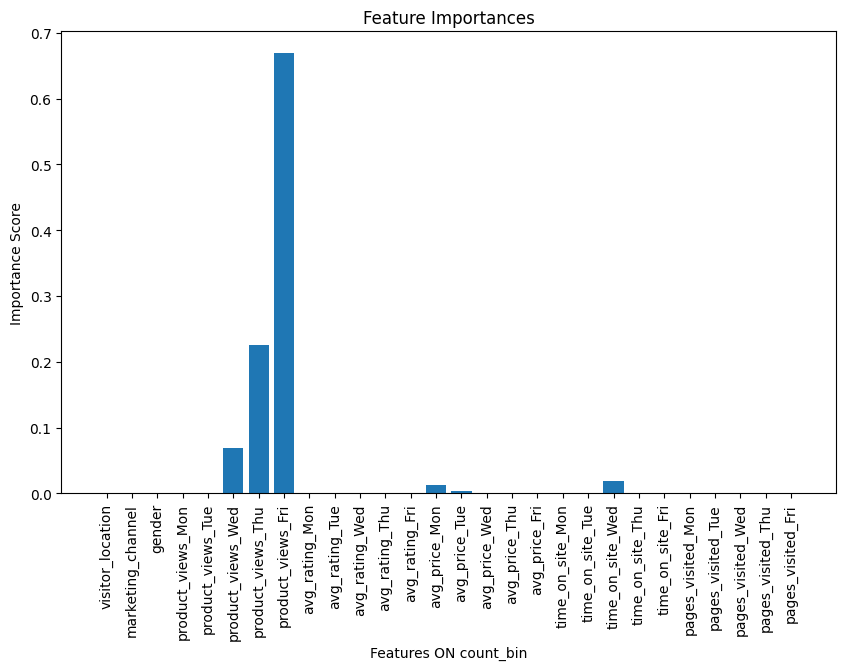

In [475]:
param_dist = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

model = DecisionTreeClassifier(random_state=42)
grid_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
feature_importances = best_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features ON count_bin')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()